<a href="https://colab.research.google.com/github/andygomzang/Machine-Learning/blob/main/Bagging/Bagging_Classifier_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Precisión: 95.61%

Informe de Clasificación:
               precision    recall  f1-score   support

     Maligno       0.95      0.93      0.94        43
     Benigno       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



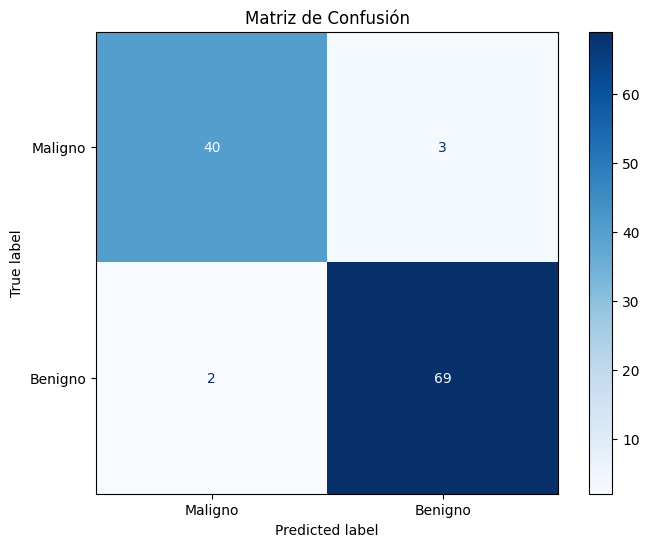

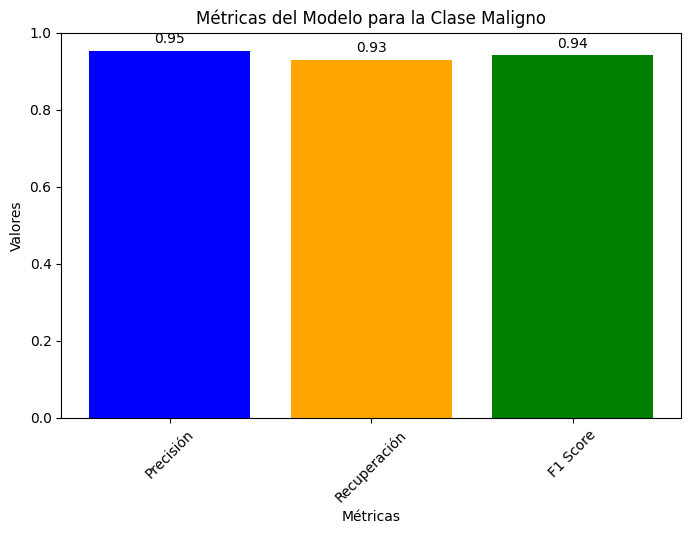

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Cargar el conjunto de datos de cáncer de mama
data = load_breast_cancer()
X = data.data  # Características
y = data.target  # Etiquetas (0 = maligno, 1 = benigno)

# Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de Bagging Classifier usando un árbol de decisión como modelo base
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Entrenar el modelo
bagging_model.fit(X_train, y_train)

# Realizar predicciones
predictions = bagging_model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print(f"Precisión: {accuracy * 100:.2f}%")

# Mostrar el informe de clasificación
report = classification_report(y_test, predictions, target_names=['Maligno', 'Benigno'], output_dict=True)
print("\nInforme de Clasificación:\n", classification_report(y_test, predictions, target_names=['Maligno', 'Benigno']))

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Maligno', 'Benigno']).plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title('Matriz de Confusión')
plt.show()

# Gráfica de métricas
metrics = ['Precisión', 'Recuperación', 'F1 Score']
values = [report['Maligno']['precision'], report['Maligno']['recall'], report['Maligno']['f1-score']]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.title('Métricas del Modelo para la Clase Maligno')
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()
